In [38]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score, confusion_matrix ,recall_score, roc_auc_score , roc_curve, classification_report,ConfusionMatrixDisplay
tqdm.pandas()

In [105]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        ConfusionMatrixDisplay.from_predictions(y_train, pred) 
        plt.show()
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        ConfusionMatrixDisplay.from_predictions(y_test, pred) 
        plt.show()
        

pd.set_option('display.max_columns', 500)
   ### VIF SCORE : ---------->
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
def vif_score(x):
    scaler = StandardScaler()
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i] , variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], 
                        columns = ["FEATURE" , "VARIANCE INFLATION FACTOR"]) 

In [39]:
# importing the Dataset

messages = pd.read_csv('SMSSpamCollection.txt', sep='\t', header=None, names=["label", "message"])

### Word 2 Vec Implementation

In [40]:
messages.head(1)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."


In [41]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
sentences = messages['message'].to_list()

corpus = [
    ' '.join(lemmatizer.lemmatize(word) for word in re.sub('[^a-zA-Z]', ' ', sentence.lower()).split() if word not in stop_words)
    for sentence in sentences
]

In [42]:
corpus[:5]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though']

In [43]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [44]:
words =[]
for sent in corpus:
    sent_token = sent_tokenize(sent)   ### convert every sentence in a list
    for sent in sent_token:
        ## Lowering every word
        words.append(simple_preprocess(sent))

In [45]:
words[1]

['ok', 'lar', 'joking', 'wif', 'oni']

In [46]:
import gensim

In [47]:
## LET'S TRAIN WORD2VEC FROM SCRATCH
model = gensim.models.Word2Vec(words, window = 5, min_count = 2)

### window :-> How Many Context Of The Word On The Left Hand Side And The Right Hand Side Of the That We Basically Have To Take

In [48]:
model.wv.index_to_key

['call',
 'get',
 'ur',
 'gt',
 'lt',
 'go',
 'ok',
 'day',
 'free',
 'know',
 'come',
 'like',
 'time',
 'good',
 'got',
 'love',
 'text',
 'want',
 'send',
 'need',
 'one',
 'txt',
 'today',
 'going',
 'stop',
 'home',
 'lor',
 'sorry',
 'see',
 'still',
 'mobile',
 'take',
 'back',
 'da',
 'reply',
 'dont',
 'think',
 'tell',
 'week',
 'hi',
 'phone',
 'new',
 'later',
 'please',
 'pls',
 'co',
 'msg',
 'min',
 'make',
 'night',
 'dear',
 'message',
 'well',
 'say',
 'thing',
 'much',
 'oh',
 'hope',
 'claim',
 'great',
 'hey',
 'give',
 'number',
 'happy',
 'wat',
 'friend',
 'work',
 'way',
 'yes',
 'www',
 'prize',
 'let',
 'right',
 'tomorrow',
 'already',
 'tone',
 'ask',
 'win',
 'said',
 'life',
 'cash',
 'amp',
 'yeah',
 'im',
 'really',
 'meet',
 'babe',
 'find',
 'miss',
 'morning',
 'thanks',
 'last',
 'uk',
 'service',
 'year',
 'anything',
 'care',
 'would',
 'com',
 'also',
 'lol',
 'nokia',
 'feel',
 'every',
 'keep',
 'sure',
 'pick',
 'urgent',
 'sent',
 'contact',


In [49]:
model.corpus_count  ## Total Vocaulary Size 

5564

In [50]:
model.epochs

5

In [51]:
##### We Are Getting Similar Word From Our Dataset

In [52]:
model.wv.similar_by_word('love')

[('day', 0.9997541904449463),
 ('life', 0.9997448325157166),
 ('hope', 0.9997308254241943),
 ('much', 0.9997125864028931),
 ('say', 0.9997074007987976),
 ('one', 0.9996979236602783),
 ('amp', 0.9996932148933411),
 ('thing', 0.9996891021728516),
 ('need', 0.9996861219406128),
 ('keep', 0.9996837377548218)]

In [53]:
model.wv.similar_by_word('happy')

[('year', 0.99944669008255),
 ('day', 0.9993993639945984),
 ('make', 0.999386727809906),
 ('hello', 0.999386727809906),
 ('dear', 0.9993457794189453),
 ('new', 0.9993234872817993),
 ('keep', 0.9993164539337158),
 ('amp', 0.9993157386779785),
 ('like', 0.9993140697479248),
 ('dont', 0.9993070960044861)]

In [54]:
model.wv['kid'].shape

(100,)

In [55]:
words[1]

['ok', 'lar', 'joking', 'wif', 'oni']

In [56]:
model.wv[words[1]]

array([[-1.44973814e-01,  4.32760894e-01,  2.23771483e-01,
         4.95962687e-02,  4.85409088e-02, -4.84862030e-01,
         1.36924803e-01,  7.79477119e-01, -2.46823683e-01,
        -2.34806642e-01, -2.25427762e-01, -5.11732399e-01,
        -4.63253679e-03,  1.68676347e-01,  1.05385713e-01,
        -4.29730207e-01,  4.07113209e-02, -5.06914675e-01,
        -2.45729741e-02, -6.75379634e-01,  1.15925983e-01,
         2.35166281e-01,  1.62584677e-01, -1.95381328e-01,
        -1.62632376e-01,  5.01688235e-02, -3.24848175e-01,
        -2.23506615e-01, -3.30764562e-01,  7.21189156e-02,
         4.41410333e-01,  8.98263231e-02,  2.20977962e-01,
        -3.45654339e-01, -1.86300457e-01,  3.96723717e-01,
         4.93150391e-02, -2.96301484e-01, -2.67667323e-01,
        -5.64905107e-01,  9.88725200e-02, -3.43163699e-01,
        -1.33968219e-01,  6.26692399e-02,  3.76153171e-01,
        -1.90251797e-01, -2.66918629e-01,  4.18547727e-02,
         2.23667458e-01,  3.52452368e-01,  2.51473010e-0

In [57]:
def avg_word2Vec(doc):
    #remove out of vocabulary words
#     sent = [word for word in doc if word in model.wv.index.to_key]
#     print(sent)
    return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key], axis =0)
            ## or [np.zeros(len(model.wv.index.to_key))], axis =0  model.wv.index_to_key

In [60]:
# avg_word2Vec(words[0])

In [61]:
type(model.wv.index_to_key)

list

In [62]:
### Apply For The Entire Sentence 
X = []
for i in tqdm(range(len(words))):
#     print(words[i])
    X.append(avg_word2Vec(words[i]))

100%|██████████| 5564/5564 [00:02<00:00, 2728.13it/s]


In [63]:
type(X)

list

In [64]:
X_new = np.array(X, dtype=object)

In [66]:
X_new[0].shape

(100,)

In [71]:
X_new.shape,

(5564,)

In [74]:
messages.shape

(5572, 2)

In [78]:
y = messages[list(map(lambda x: len(x)>0, corpus))]
y=pd.get_dummies(y['label'])
y = y.iloc[:,0].values

In [87]:
y.shape

(5564,)

In [84]:
# ## this is the final independent features
# df=pd.DataFrame()
# for i in range(0,len(X)):
#     df=df.append(pd.DataFrame(X[i].reshape(1,-1)),ignore_index=True)

In [88]:
yy = []
for i in range(len(X)):
    df = pd.DataFrame(X_new[i].reshape(1,-1))
    yy.append(df)
X = pd.concat(yy)

C:\Users\hp\AppData\Local\Temp\ipykernel_10752\3206172428.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  X = pd.concat(yy)


In [92]:
final_df = X.copy()
final_df['output']=y

In [94]:
final_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,output
0,-0.103245,0.290625,0.144959,0.03103,0.034053,-0.32151,0.085708,0.517325,-0.158601,-0.155782,...,0.142954,0.062542,0.147448,0.336121,0.269333,0.119837,-0.284828,0.101523,-0.050474,True


In [95]:
final_df.dropna(inplace=True)

In [101]:
X = final_df.drop(['output'], axis =1)
y = final_df['output']

In [102]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [103]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()

In [104]:
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [106]:
y_pred = classifier.predict(X_test)
print("PREDICTED DATA : - ", y_pred)
print("ACTUAL DATA : - ", np.array(y_test))

PREDICTED DATA : -  [ True  True  True ...  True False  True]
ACTUAL DATA : -  [ True  True  True ...  True False  True]


In [108]:
print("TEST SCORE  " ,classifier.score(X_test, y_test)*100)
print("TRAIN SCORE ", classifier.score(X_train, y_train)*100)

TEST SCORE   95.04057709648332
TRAIN SCORE  100.0


Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
           False    True  accuracy  macro avg  weighted avg
precision    1.0     1.0       1.0        1.0           1.0
recall       1.0     1.0       1.0        1.0           1.0
f1-score     1.0     1.0       1.0        1.0           1.0
support    579.0  3853.0       1.0     4432.0        4432.0
_______________________________________________


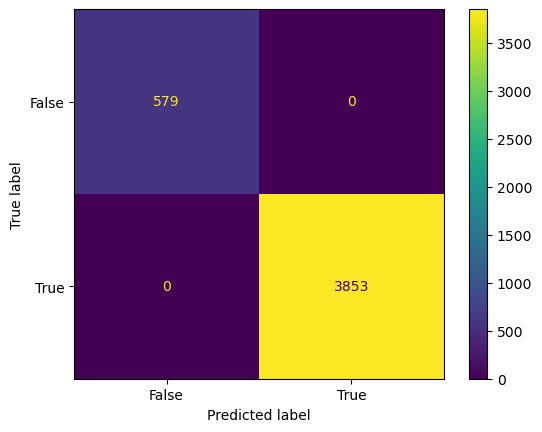

Test Result:
Accuracy Score: 95.04%
_______________________________________________
CLASSIFICATION REPORT:
                False        True  accuracy    macro avg  weighted avg
precision    0.952000    0.950203  0.950406     0.951102      0.950475
recall       0.708333    0.993624  0.950406     0.850979      0.950406
f1-score     0.812287    0.971429  0.950406     0.891858      0.947321
support    168.000000  941.000000  0.950406  1109.000000   1109.000000
_______________________________________________


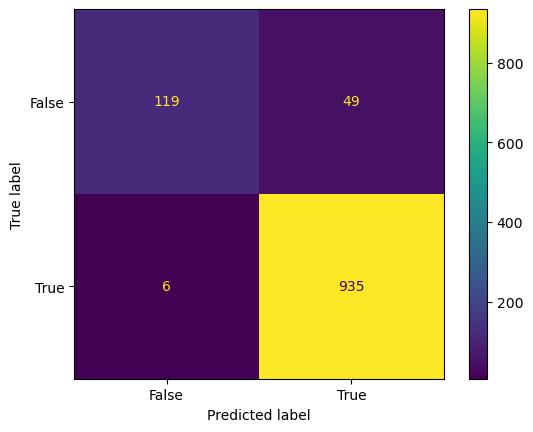

In [109]:
print_score(classifier, X_train, y_train, X_test, y_test, train=True)
print_score(classifier, X_train, y_train, X_test, y_test, train=False)